In [137]:
import pandas as pd

In [138]:
df = pd.read_csv('passengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


<Axes: >

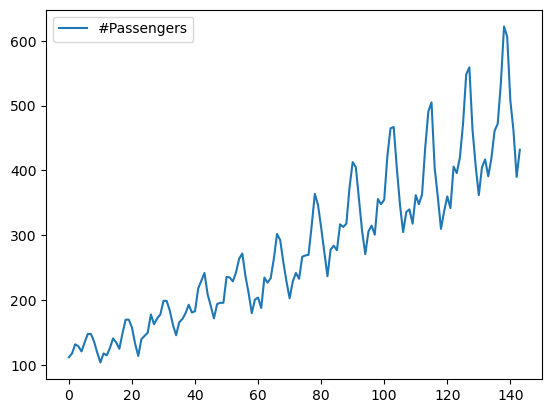

In [139]:
df.plot()

In [140]:
df['Year'] = df.Month.apply(lambda x: x[:4])
df['Month'] = df.Month.apply(lambda x: x[-2:])

In [141]:
df

,Month,#Passengers,Year
0,01,112,1949
1,02,118,1949
2,03,132,1949
3,04,129,1949
4,05,121,1949
...,...,...,...
139,08,606,1960
140,09,508,1960
141,10,461,1960
142,11,390,1960


In [142]:
conCAT = pd.concat

<Axes: xlabel='Month'>

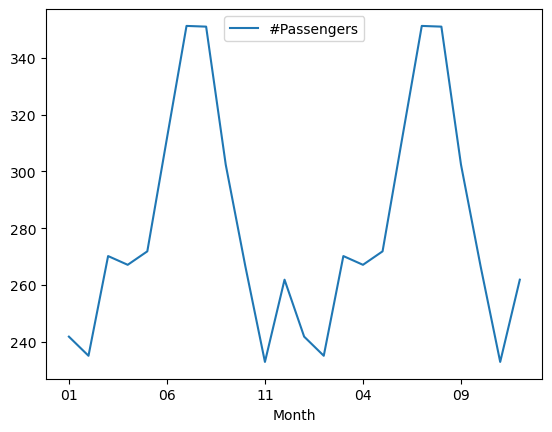

In [143]:
df_ = df[['Month', '#Passengers']].groupby('Month').mean()
(conCAT([df_, df_])).plot()

In [144]:
df.groupby('Year')['#Passengers'].mean()

Year
1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    428.333333
1960    476.166667
Name: #Passengers, dtype: float64

In [145]:
df.groupby('Year')['#Passengers'].var()

Year
1949     188.242424
1950     363.696970
1951     339.969697
1952     527.454545
1953     810.363636
1954    1219.719697
1955    1775.818182
1956    2290.750000
1957    3351.356061
1958    4164.181818
1959    4876.242424
1960    6043.060606
Name: #Passengers, dtype: float64

<Axes: >

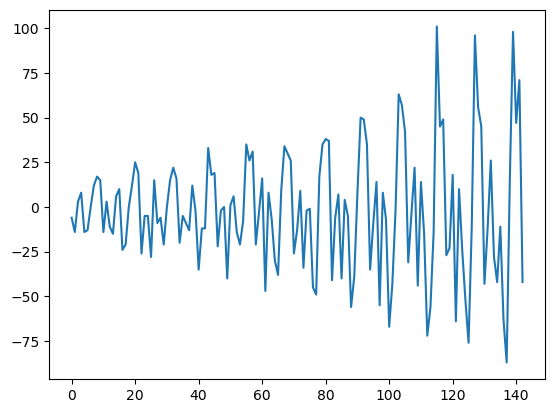

In [146]:
(df['#Passengers'] - df['#Passengers'].shift(-1)).plot()


<Axes: >

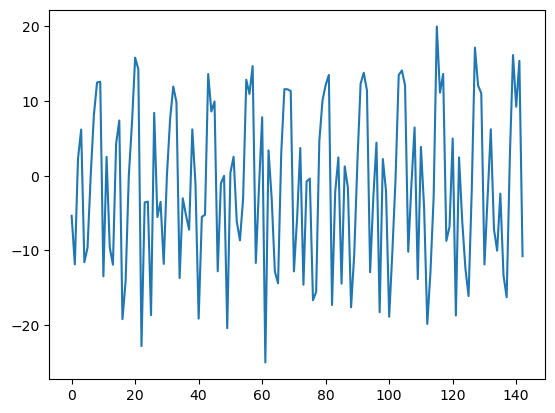

In [147]:
((df['#Passengers'] - df['#Passengers'].shift(-1)) / df['#Passengers'] * 100).plot()

In [148]:
df['date'] = pd.to_datetime(df.Year + '-' + df.Month)

In [149]:
df

,Month,#Passengers,Year,date
0,01,112,1949,1949-01-01
1,02,118,1949,1949-02-01
2,03,132,1949,1949-03-01
3,04,129,1949,1949-04-01
4,05,121,1949,1949-05-01
...,...,...,...,...
139,08,606,1960,1960-08-01
140,09,508,1960,1960-09-01
141,10,461,1960,1960-10-01
142,11,390,1960,1960-11-01


In [150]:
ts = pd.Series(df['#Passengers'].to_list(), index=df.date)

In [151]:
ts

date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Length: 144, dtype: int64

### resample не может увеличить частоту дискретизации

In [152]:
ts.resample(pd.Timedelta(days=1)).sum()

date
1949-01-01    112
1949-01-02      0
1949-01-03      0
1949-01-04      0
1949-01-05      0
             ... 
1960-11-27      0
1960-11-28      0
1960-11-29      0
1960-11-30      0
1960-12-01    432
Freq: D, Length: 4353, dtype: int64

In [153]:
ts.resample(pd.Timedelta(days=1)).mean()

date
1949-01-01    112.0
1949-01-02      NaN
1949-01-03      NaN
1949-01-04      NaN
1949-01-05      NaN
              ...  
1960-11-27      NaN
1960-11-28      NaN
1960-11-29      NaN
1960-11-30      NaN
1960-12-01    432.0
Freq: D, Length: 4353, dtype: float64

### А в случае с дискритезацией выше чем за 1 месяц - это ничем не отличается от обычной агрегации по году или группировке по 2 месяцам

In [154]:
ts.resample(pd.Timedelta(days=365)).mean()

date
1949-01-01    126.666667
1950-01-01    139.666667
1951-01-01    170.166667
1952-01-01    197.000000
1952-12-31    225.000000
1953-12-31    238.916667
1954-12-31    284.000000
1955-12-31    328.250000
1956-12-30    368.416667
1957-12-30    381.000000
1958-12-30    428.333333
1959-12-30    476.166667
Freq: 365D, dtype: float64

In [155]:
ts.resample(pd.Timedelta(days=60)).mean()

date
1949-01-01    120.666667
1949-03-02    129.000000
1949-05-01    128.000000
1949-06-30    148.000000
1949-08-29    127.500000
                 ...    
1960-03-04    466.500000
1960-05-03    578.500000
1960-07-02    606.000000
1960-08-31    484.500000
1960-10-30    411.000000
Freq: 60D, Length: 73, dtype: float64